# Plan
1. Understand the Dataset Structure:
    - This dataset contains multiple tables, just like a real company database.
    - Important Tables
        - `Orders.csv` : Each Order + status + stamps
        - `order_items.csv`: Item wise detail of each order
        - `products.cs`v: Product Details
        - `Order.csv`: Order Detail
        - `sellers.csv`: seller info
        - `customers.csv`: customer info
        - `order_payments.csv`: Payment Methods
        - `orders_review.csv`: Customer review text + rating
        - `geolocation.csv`: Lat/Long info
2. Identify Primary Relationships between table:
    - `order_id` is the hub -> connects many tables
    - `product_id` connects items -> products
    - `seller_id` connects sellers -> seller
    - `customer_id` connects order -> customers
    - `order_id` connects orders -> payments -> reviews

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Libraries:
- `pandas` : To analyze, clean, restructure and join different tables.
- `matplotlib.pyplot`: To visualize data to make analysis and describing data easier.
- `seaborn`: To visualize data and analyze data more deeply.

In [3]:
customers = pd.read_csv('./dataset/customers.csv')
geolocations = pd.read_csv('./dataset/geolocations.csv')
order_items = pd.read_csv('./dataset/order_items.csv')
order_payments = pd.read_csv('./dataset/order_payments.csv')
order_reviews = pd.read_csv('./dataset/customers.csv')
orders = pd.read_csv('./dataset/orders.csv')
pcnt = pd.read_csv('./dataset/product_category_name_translation.csv')
products = pd.read_csv('./dataset/products.csv')
sellers = pd.read_csv('./dataset/sellers.csv')


# Loading Data
- Loading data into jupyter using pandas
    - `pd.read_csv('file_name.csv')`
- We have assigned the csv names are variables which makes it easier to understand, with which dataset are we working currently.

In [4]:
print(f'''
    Customer Table Columns: {customers.columns} \n
    geolocations Table Columns: {geolocations.columns} \n
    order_items Table Columns: {order_items.columns} \n
    order_payments Table Columns: {order_payments.columns} \n
    order_reviews Table Columns: {order_reviews.columns} \n
    orders Table Columns: {orders.columns} \n
    pcnt Table Columns: {pcnt.columns} \n
    products Table Columns: {products.columns} \n
    sellers Table Columns: {sellers.columns} \n
''')



    Customer Table Columns: Index(['customer_id', 'customer_unique_id', 'customer_zip_code_prefix',
       'customer_city', 'customer_state'],
      dtype='object') 

    geolocations Table Columns: Index(['geolocation_zip_code_prefix', 'geolocation_lat', 'geolocation_lng',
       'geolocation_city', 'geolocation_state'],
      dtype='object') 

    order_items Table Columns: Index(['order_id', 'order_item_id', 'product_id', 'seller_id',
       'shipping_limit_date', 'price', 'freight_value'],
      dtype='object') 

    order_payments Table Columns: Index(['order_id', 'payment_sequential', 'payment_type',
       'payment_installments', 'payment_value'],
      dtype='object') 

    order_reviews Table Columns: Index(['customer_id', 'customer_unique_id', 'customer_zip_code_prefix',
       'customer_city', 'customer_state'],
      dtype='object') 

    orders Table Columns: Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_d

# Understanding what columns exists
- We have output all the column in each dataset table. 
- This will help when are going to join tables and work with the table.

In [5]:
print(f'''
    {customers.info()} 
    {geolocations.info()} 
    {order_items.info()} 
    {order_payments.info()} 
    {order_reviews.info()} 
    {orders.info()} 
    {pcnt.info()} 
    {products.info()} 
    {sellers.info()} 
''')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  

# Table information
- We have used the `info()` function to check the details of all tabel.
- This shows:
    - Length of data
    - Dtype of the columns
    - are they null or non-non
    - Column names
    - Number of Columns

- We found out that all the tables do not have any null value
- As all the tables have columns with non-null type.

In [6]:
orders[['Date','Time']] = orders['order_purchase_timestamp'].str.split(' ',expand=True)

orders['Date'] = pd.to_datetime(orders['Date'])
orders['Time'] = pd.to_datetime(orders['Time'],format='%H:%M:%S').dt.time

orders['Date'].info()


<class 'pandas.core.series.Series'>
RangeIndex: 99441 entries, 0 to 99440
Series name: Date
Non-Null Count  Dtype         
--------------  -----         
99441 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 777.0 KB


# Type Conversion (orders table)

- Timestamp of orders was in object datatype.
- This would have caused it to not work properly when setting up visual.
- To change the dtype:
    - `table['column'] = pd.to_datetime(table['column']).dt.date`
- This will change the dtype from `object` to `datetime`.
- But still this has both date and the time in single column. 
- So we do:
   - `table[['column1','column2']] = table['tosplit'].str.split(' ', expand=True)`
- This is generate two new column with names given by spitting the timestamp column into two

Text(0.5, 1.0, 'Order Payment Value Distribution')

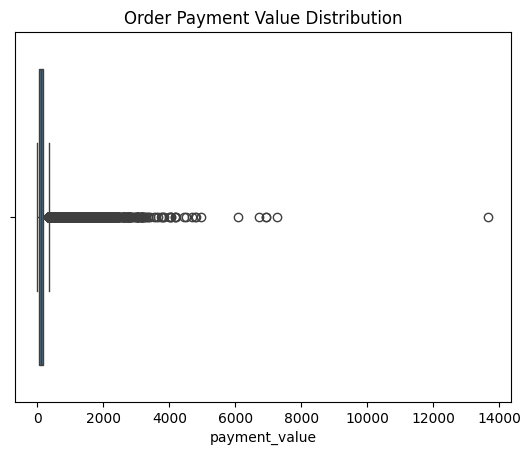

In [7]:
df = orders.merge(order_payments, on='order_id', how='left')
order_total = df.groupby('order_id')['payment_value'].sum().reset_index()

order_outliers = orders.merge(order_total, on='order_id', how='left')

sns.boxplot(x=order_outliers['payment_value'])
plt.title('Order Payment Value Distribution')


# Outlier Check on Orders

1. Most payments are very small
    - The entire box is squeezed on the left side, indicating that:
        - Majority if customers make low-value purchases.
        - The typical order_value is far below 500rs
    - This is Expected in marketplace with low-cost items.
2. Long tail of high-value orders:
    - Multiple points appear far to the right, including values around:
        - 3000
        - 5000
        - 7000
        - 14000 
    - These present:
        - Bulk orders
        - High ticket items
        - Multi-item Purchase
        - Customer Paying via multiple installments
3. Presence of multiple extreme outliers:
    - The points far from the box indicate very high value payments.
    - These are unusual comapared to the majority and may need futher investigation:
        - Are these corporate buyers.
        - Specific Product Categories.
        - Sellers with expensive listing.

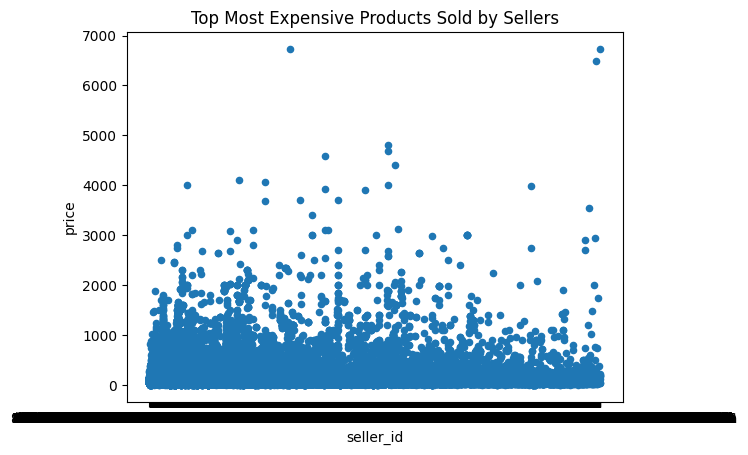

In [8]:
expensive_sellers = order_items.groupby('seller_id')[['seller_id','product_id','price']].head(100000).reset_index()
expensive_sellers_product = expensive_sellers.merge(products, on='product_id', how='inner')[['seller_id','price','product_category_name']].reset_index(drop=True)
expensive_sellers_product = expensive_sellers_product.merge(pcnt, on='product_category_name', how='left').drop('product_category_name', axis=1)

expensive_sellers.plot(kind='scatter', x='seller_id', y='price', title='Top Most Expensive Products Sold by Sellers')
plt.show()


# Expensive Sellers Scatter Plot

1. Lower Range:
    - Most of the items are under 1000rs range.
    - These items maybe of daily use 
        - items
        - groceries
        - stationary
        - Low value accesories
2. Mid Range:
    - The mid range if from 1000 and goes to like 3000.
    - These are general use and semi luxury items like
        - Home appliances.
        - Fashion Items.
        - Small Electronics.
        - Mid-range gadgets
3. High Range:
    - The hight range is from 3000 and almost to 7000.
    - A noticeable number of points appear in this band.
    - These items include:
        - Premium Electronics
        - Television
        - Large Appliances.
        - High quality furniture or decor
 


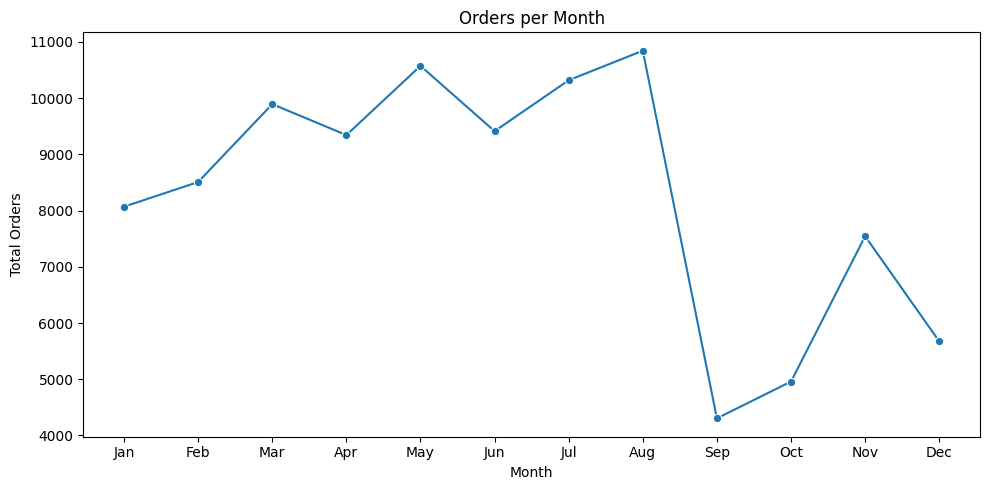

In [9]:
# 1. Make Month column (short name)
orders['Month'] = orders['Date'].dt.strftime('%b')

# 2. Aggregate: orders per month
month_counts = (
    orders.groupby('Month')['order_id']
          .count()
          .reset_index()
)

# 3. Set proper month order on the *aggregated* df
month_order = ['Jan','Feb','Mar','Apr','May','Jun',
               'Jul','Aug','Sep','Oct','Nov','Dec']

month_counts['Month'] = pd.Categorical(
    month_counts['Month'],
    categories=month_order,
    ordered=True
)

month_counts = month_counts.sort_values('Month')

# 4. Optional rename
month_counts = month_counts.rename(columns={'order_id': 'Total Orders'})

# 5. Plot from month_counts, not orders
plt.figure(figsize=(10,5))
sns.lineplot(
    data=month_counts,
    x='Month',
    y='Total Orders',
    marker='o',
    errorbar=None
)
plt.title("Orders per Month")
plt.xlabel("Month")
plt.ylabel("Total Orders")
plt.tight_layout()
plt.show()


# Orders Per Month
- After analysis Orders on monthly basis we found out that most of the orders peak in month `Jun` and `Jul` a most. 
- But there are periodic rise in orders every 2 months.
- The reason behind `Jun` and `Jul` rise is the festivals that take place in brazil in `5th` `7th` or `8th` month.
- During these months people tend to order festive items like `costumes`, `new accesories` , etc.
- Once festive season is over orde rate tend to fall as no offers/deals are not available and no festivals.
- We can try to launch new offers or deals in month of `Sept` to give orders a stable rise and fall and not these major falls.

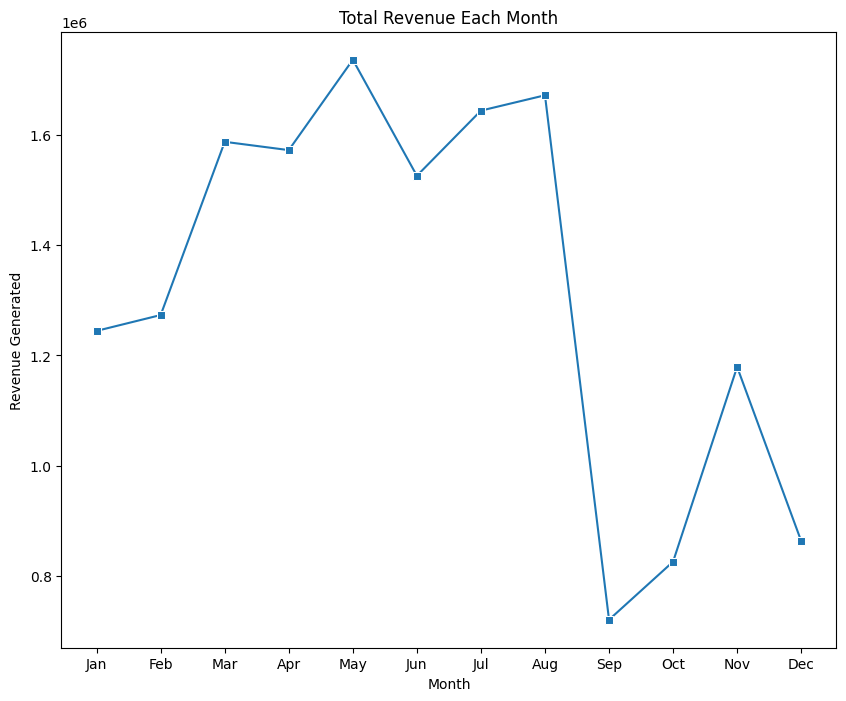

   Month     revenue
4    Jan  1244490.38
3    Feb  1273189.58
7    Mar  1587175.41
0    Apr  1572120.28
8    May  1735972.77
6    Jun  1525640.15
5    Jul  1643699.65
1    Aug  1671513.07
11   Sep   720920.12
10   Oct   826121.21
9    Nov  1179143.77
2    Dec   863566.85


In [10]:
order_items['revenue'] = order_items['freight_value'] + order_items['price']

orders_merged = orders.merge(order_items,on='order_id',how='inner')

total_revenue_Pm = orders_merged.groupby('Month')['revenue'].sum().reset_index()

total_revenue_Pm['Month']= pd.Categorical(
    total_revenue_Pm['Month'],
    categories=month_order,
    ordered=True
)

total_revenue_Pm = total_revenue_Pm.sort_values('Month')

plt.figure(figsize=(10,8))
plt.title('Total Revenue Each Month')

sns.lineplot(data=total_revenue_Pm, errorbar=None, x='Month', y='revenue',marker='s')
plt.xlabel('Month')
plt.ylabel('Revenue Generated')
plt.yticks()
plt.show()
print(total_revenue_Pm)



# Monthly Revenue Trend Analysis

1. Strong Revenue Growth in Early Month:
    - Jan -> May revenue rises steadily, indicating a period of increased customer spending, like due to seasonality or marketing campaigns.
2. Mid Year Stability:
    - Revenue Remains Consistent high during June -> August.
    - This suggest stable period with regular orders flow and strong sales performance.
3. Sharp Drop in September
    - A significant drop can be seen in September, which may include:
        - Seasional Dip
        - Fewer Promotions
        - Operational / Logistics Issue
        - Order Cancellatios or Delays.
4. Late Year Recoverly:
    - Revenue Starts improving again as start of october and reaches a small peak in november, likely due to:
        - Festive season
        - Holiday Shopping Trends
        - Discount Campaigns
5. Slight drop in december:
    - There is a small decline in month of december which could relate to end of year stock issues or shipping slowdowns.


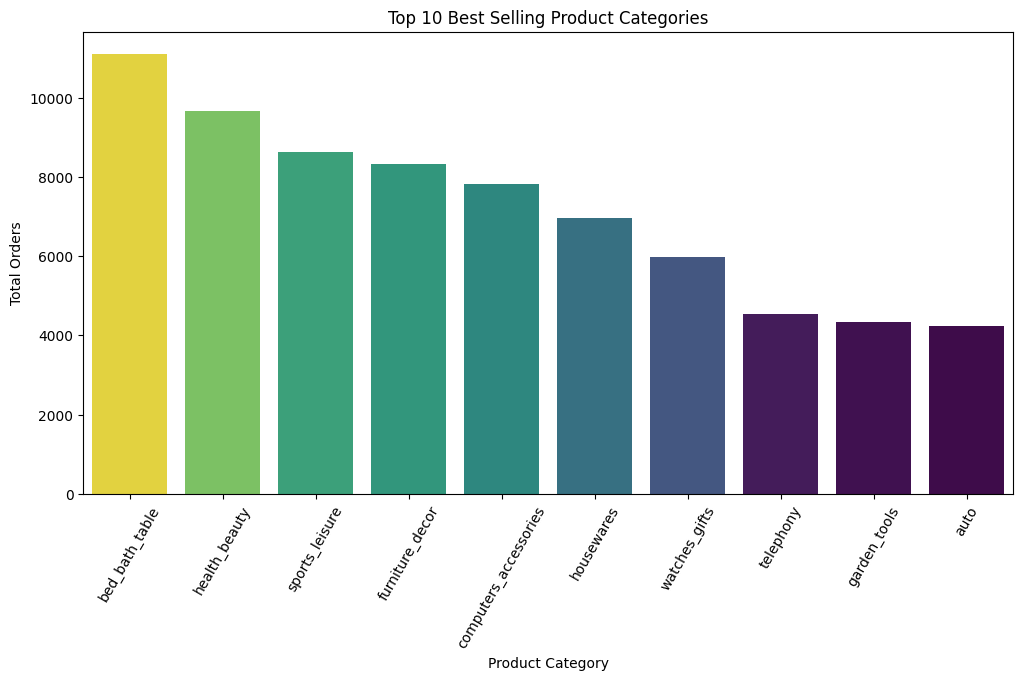

In [11]:
best_selling_categories = order_items.merge(products, on='product_id', how='inner')
best_selling_categories = best_selling_categories.groupby('product_category_name')['order_item_id'].count().reset_index()
best_selling_categories = best_selling_categories.sort_values(by='order_item_id', ascending=False).head(10)

best_selling_categories = best_selling_categories.merge(pcnt, left_on='product_category_name', right_on='product_category_name', how='left')
best_selling_categories = best_selling_categories[['product_category_name_english', 'order_item_id']]
best_selling_categories.columns = ['Product Category', 'Total Orders']
plt.figure(figsize=(12,6))
sns.barplot(data=best_selling_categories, x='Product Category', y='Total Orders', palette='viridis', hue='Total Orders', legend=False)
plt.xticks(rotation=60)
plt.title('Top 10 Best Selling Product Categories')
plt.show()


# Top 10 Products by Total Order Count
- The chart shows the 10 product categories with the highest number of orders. 
- The top category is bed_bath_table, followed by health_beauty and sports_leisure, all with very high order counts. 
- In the middle are furniture_decor, computers_accessories, and housewares with slightly fewer orders. 
- The lowest among the top 10 are watches_gifts, telephony, garden_tools, and auto, which still perform well but have noticeably fewer orders than the leading categories.

Top 1 category code: cama_mesa_banho
Bottom 1 category code: seguros_e_servicos


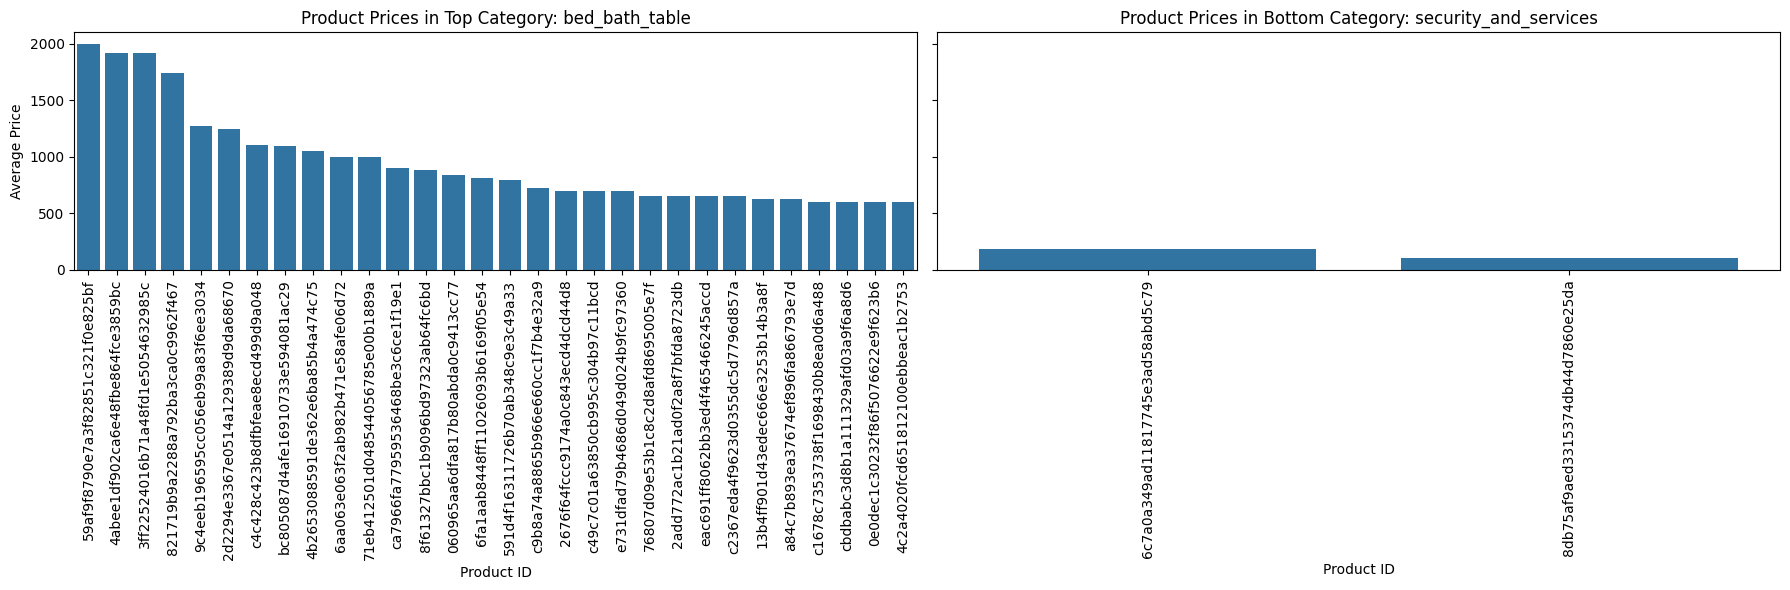

In [12]:
# Base item-level df with category + price
items = order_items.merge(products, on='product_id', how='inner')

# Total orders per category
cat_sales = (
    items
    .groupby('product_category_name')['order_item_id']
    .count()
    .reset_index(name='total_sales')
    .sort_values(by='total_sales',ascending=False)
)

# Top-1 and Bottom-1 category keys
top1_cat = cat_sales.sort_values('total_sales', ascending=False).iloc[0]['product_category_name']
bottom1_cat = cat_sales.sort_values('total_sales', ascending=True).iloc[0]['product_category_name']

print("Top 1 category code:", top1_cat)
print("Bottom 1 category code:", bottom1_cat)

# Filter items belonging to top-1 and bottom-1 categories
top1_items = items[items['product_category_name'] == top1_cat].copy()
bottom1_items = items[items['product_category_name'] == bottom1_cat].copy()

# Avg price per product in each category
top1_prod_price = (
    top1_items
    .groupby('product_id')['price']
    .mean()
    .reset_index()
)

bottom1_prod_price = (
    bottom1_items
    .groupby('product_id')['price']
    .mean()
    .reset_index()
)

# Optional: limit if too many products (e.g., top 30 by price)
top1_prod_price = top1_prod_price.sort_values('price', ascending=False).head(30)
bottom1_prod_price = bottom1_prod_price.sort_values('price', ascending=False).head(30)


def get_cat_name(cat_code):
    row = pcnt[pcnt['product_category_name'] == cat_code]
    if not row.empty:
        return row['product_category_name_english'].iloc[0]
    return cat_code  # fallback

top1_name = get_cat_name(top1_cat)
bottom1_name = get_cat_name(bottom1_cat)


import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(1, 2, figsize=(18, 6), sharey=True)
plt.subplots_adjust(wspace=0.4)

# LEFT: Top-1 category
sns.barplot(
    data=top1_prod_price,
    x=top1_prod_price['product_id'].astype(str),
    y='price',
    ax=ax[0]
)
ax[0].set_title(f'Product Prices in Top Category: {top1_name}')
ax[0].set_xlabel('Product ID')
ax[0].set_ylabel('Average Price')
ax[0].tick_params(axis='x', rotation=90)

# RIGHT: Bottom-1 category
sns.barplot(
    data=bottom1_prod_price,
    x=bottom1_prod_price['product_id'].astype(str),
    y='price',
    ax=ax[1]
)
ax[1].set_title(f'Product Prices in Bottom Category: {bottom1_name}')
ax[1].set_xlabel('Product ID')
ax[1].set_ylabel('')  # shared y-axis
ax[1].tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()


# Top Category and Bottom Category Analysis

1. Top Category (bed_bath_table):
- Product prices mostly fall between ₹500 and ₹2,000.
- These are everyday household items (towels, bedsheets, table covers, linens).
- Such products have regular purchase cycles — replacements, upgrades, seasonal buying.
- Prices are relatively balanced and affordable, which encourages repeat orders.
- The combination of low price + high utility drives strong overall sales volume.
2. Bottom Category (security_and_services):
- Product prices in this category mostly fall below ₹500, making them inexpensive but also very limited in variety.
- The category contains only two products, typically small security-related items.
- These items usually include basic cameras, door locks, or small security accessories.
- They are not frequent purchases — customers buy them once or only when replacing old units.
- Demand is use-case driven, meaning only customers with a specific need will purchase them.
- Although these products relate to personal security, their low necessity + low variety results in very low sales volume compared to other categories.

In [13]:
import folium

geolocations = geolocations.rename(columns={'geolocation_zip_code_prefix':'customer_zip_code_prefix'})

cust_geo = geolocations.merge(customers, on='customer_zip_code_prefix', how='inner')
cust_geo = cust_geo.groupby('customer_id')[['geolocation_lat','geolocation_lng']].mean().reset_index()
m = folium.Map(location=[17.26584,85.121711],zoom_start = 4)

samplegeo = cust_geo.sample(2000)
print(samplegeo.head())

for _, row in samplegeo.iterrows():
    folium.CircleMarker(
        location=[row['geolocation_lat'], row['geolocation_lng']],
        radius=1,
        color='blue',
        fill=True,
        fill_opacity=0.5,
        tiles='cartodbpositron'
    ).add_to(m)

m


                            customer_id  geolocation_lat  geolocation_lng
14772  260d3578e7364bc239a08277dfec894e       -23.629843       -46.615623
7179   129ccde4bb98af5b8f8b0b7e15972852       -22.930174       -43.346440
6161   10040f52d3ff7967bd8f5e08b3a38e22       -29.231047       -53.678513
35221  5b4409c0035f6db6b178b2d5b7e30ba3       -23.584989       -46.767232
18751  306e7f5a781430174600acfec52a1843       -23.543792       -46.658544


# Gelocation Analysis by customer

1. Southeast Cluster: Sāo Paulo, Rio de Janeiro
- Very dense dots.
- Brazil's largest e-commerce zone.

2. South: Parana, Santa Catarina, Rio Grande do Sul
- Medium Density Cluster below.

3. NorthEast belt: Bahia, Pernambuco, Ceara
- Dots along the coast

4. North: Amazon:
- Fewer Dots
- Sparse Population
- Low e-commerce penetration

5. One dot far above:
- Roraima Region.

In [ ]:


deli = orders.copy().head(50)

# convert to datetime, keep NaT for missing
deli['order_estimated_delivery_date'] = pd.to_datetime(
    deli['order_estimated_delivery_date'], errors='coerce'
)
deli['order_delivered_customer_date'] = pd.to_datetime(
    deli['order_delivered_customer_date'], errors='coerce'
)

# 1 = on time (delivered on/before estimate), 0 = late
deli['on_time'] = (
    (deli['order_estimated_delivery_date'] >=
     deli['order_delivered_customer_date'])
    .astype(int)
)

# aggregate per date
daily = deli.groupby('order_estimated_delivery_date')['on_time'].agg(
    on_time='sum',      # number of on‑time deliveries
    total='count'       # total deliveries
)
daily['late'] = daily['total'] - daily['on_time']

# plot
plt.figure(figsize=(10, 5))
sns.lineplot(data=daily, x=daily.index, y='on_time', label='On-time')
sns.lineplot(data=daily, x=daily.index, y='late', label='Late')
plt.title('On-Time vs Late Deliveries')
plt.xlabel('Estimated delivery date')
plt.ylabel('Number of orders')
plt.show()


KeyError: 'Column not found: on_time'